In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [92]:
df = pd.read_csv('customer_churn.csv')

In [93]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
df.drop('customerID',axis=1,inplace=True)

In [95]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [96]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]
 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [97]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [98]:
df1=df[df.TotalCharges!=' ']

In [100]:
df1['TotalCharges']=pd.to_numeric(df1.TotalCharges)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_16172\3081713981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges']=pd.to_numeric(df1.TotalCharges)


In [103]:
df1['TotalCharges'].dtypes

dtype('float64')

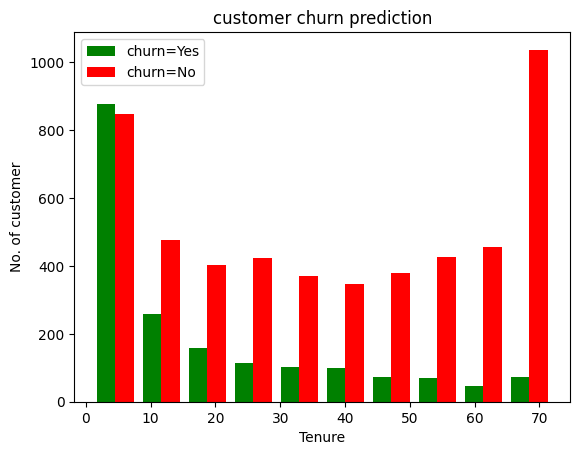

In [104]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("No. of customer")
plt.title("customer churn prediction")

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churn=Yes','churn=No'])
plt.legend()

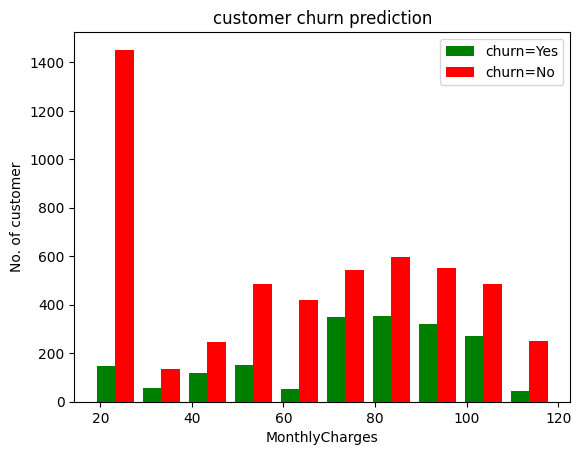

In [105]:
tenure_churn_no=df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("No. of customer")
plt.title("customer churn prediction")

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churn=Yes','churn=No'])
plt.legend()

In [106]:
def unique_col_value(df):    
    for column in df:
        if(df[column].dtypes=='object'):
            print(f'{column}:{df[column].unique()}')

In [107]:
unique_col_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [108]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_16172\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_16172\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [109]:
unique_col_value(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [110]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV',
            'StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    df1[col].replace({'Yes':1,'No':0},inplace=True)
    

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_16172\2400725361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [111]:
unique_col_value(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [112]:
for column in df1.columns:
    print(f'{column}:{df1[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [113]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_16172\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [114]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [115]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [116]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1836,0,0,0,0,24,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3250,0,0,1,0,11,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1318,0,0,0,0,8,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
7016,1,0,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [117]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [121]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [124]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3364,1,0,1,0,0.281690,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
5934,1,1,1,0,0.352113,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
284,0,0,1,1,0.239437,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2592,1,0,0,0,0.154930,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [126]:
for column in df2.columns:
    print(f'{column}:{df2[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [128]:
x=df2.drop(['Churn'],axis=1)
y=df2['Churn']

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [142]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential(
[
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
154/154 [==============================] - 1s 2ms/step - loss: 0.6224 - accuracy: 0.6510
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.7834
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.7938
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.7968
Epoch 5/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.7974
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4200 - accuracy: 0.7956
Epoch 7/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.7993
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.7999
Epoch 9/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4157 - accuracy: 0.7968
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4137 - accura

154/154 [==============================] - 1s 5ms/step - loss: 0.3737 - accuracy: 0.8226
Epoch 82/100
154/154 [==============================] - 1s 5ms/step - loss: 0.3753 - accuracy: 0.8228
Epoch 83/100
154/154 [==============================] - 1s 5ms/step - loss: 0.3730 - accuracy: 0.8230
Epoch 84/100
154/154 [==============================] - 1s 5ms/step - loss: 0.3724 - accuracy: 0.8220
Epoch 85/100
154/154 [==============================] - 1s 5ms/step - loss: 0.3724 - accuracy: 0.8261
Epoch 86/100
154/154 [==============================] - 1s 5ms/step - loss: 0.3721 - accuracy: 0.8234
Epoch 87/100
154/154 [==============================] - 1s 5ms/step - loss: 0.3721 - accuracy: 0.8251
Epoch 88/100
154/154 [==============================] - 1s 5ms/step - loss: 0.3715 - accuracy: 0.8257
Epoch 89/100
154/154 [==============================] - 1s 4ms/step - loss: 0.3706 - accuracy: 0.8247
Epoch 90/100
154/154 [==============================] - 1s 4ms/step - loss: 0.3708 - accuracy: 

In [144]:
model.evaluate(x_test,y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7929


[0.4516313672065735, 0.7928909659385681]

In [146]:
yp=model.predict(x_test)
yp[:5]

array([[0.7449998 ],
       [0.11574018],
       [0.08579654],
       [0.9105722 ],
       [0.04005826]], dtype=float32)

In [147]:
y_test[:5]

4253    0
2914    0
1569    0
5227    0
4427    0
Name: Churn, dtype: int64

In [148]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [150]:
y_pred[:5]

[1, 0, 0, 1, 0]

In [151]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.61      0.48      0.54       530

    accuracy                           0.79      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110

[[1421  159]
 [ 278  252]]


Text(50.722222222222214, 0.5, 'True value')

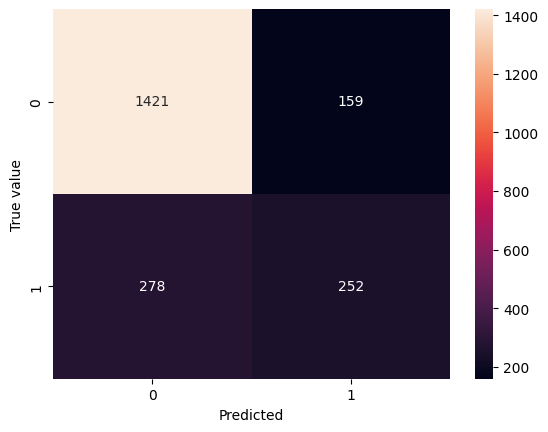

In [154]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True value')